In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split as tts, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report, confusion_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
data=pd.read_csv("/content/drive/My Drive/Boot Camp Hackathon/data.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data["isFraud"].value_counts()/data.shape[0]

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [5]:
data["isFlaggedFraud"].value_counts()/data.shape[0]

0    0.999997
1    0.000003
Name: isFlaggedFraud, dtype: float64

In [6]:
data["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [7]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [0]:
#freq_transaction=data["nameOrig"].value_counts().reset_index()

In [0]:
median_amt=data.groupby(["nameOrig"]).agg({"amount":'median'})
mean_amt=data.groupby(["nameOrig"]).agg({"amount":'mean'})

In [0]:
median_amt_recv=data.groupby(["nameDest"]).agg({"amount":'median'})
mean_amt_recv=data.groupby(["nameDest"]).agg({"amount":'mean'})

In [0]:
origin_mean_median=pd.merge(median_amt,mean_amt,on="nameOrig")
dest_mean_median=pd.merge(median_amt_recv,mean_amt_recv,on="nameDest")

In [0]:
data=pd.merge(data,origin_mean_median,on="nameOrig")

In [0]:
data=pd.merge(data,dest_mean_median,on="nameDest")

In [14]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_x_x,amount_y_x,amount_x_y,amount_y_y
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.640,9839.640,9839.640,9839.640000
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.280,1864.280,1864.280,1864.280000
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.000,181.000,139366.105,225517.832045
3,6,TRANSFER,109985.65,C570434649,41851.00,0.00,C553264065,0.00,109985.65,0,0,109985.650,109985.650,139366.105,225517.832045
4,7,CASH_IN,10256.20,C111105514,3766080.24,3776336.45,C553264065,109985.65,99729.44,0,0,23078.625,23078.625,139366.105,225517.832045


In [0]:
data.rename(columns={'amount_x_x':'median_amt_debit',
                          'amount_y_x':'mean_amt_debit',
                          'amount_x_y':'median_amt_recieved',
                          'amount_y_y':'mean_amt_recieved',}, 
                 inplace=True)

In [0]:
#data=pd.merge(data,freq_transaction,left_on='nameOrig',right_on='index')

In [17]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,median_amt_debit,mean_amt_debit,median_amt_recieved,mean_amt_recieved
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.640,9839.640,9839.640,9839.640000
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.280,1864.280,1864.280,1864.280000
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.000,181.000,139366.105,225517.832045
3,6,TRANSFER,109985.65,C570434649,41851.00,0.00,C553264065,0.00,109985.65,0,0,109985.650,109985.650,139366.105,225517.832045
4,7,CASH_IN,10256.20,C111105514,3766080.24,3776336.45,C553264065,109985.65,99729.44,0,0,23078.625,23078.625,139366.105,225517.832045


In [0]:
data.rename(columns={'nameOrig_y':'No_of_transactions','nameOrig_x':'nameOrig'},inplace=True)

In [19]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,median_amt_debit,mean_amt_debit,median_amt_recieved,mean_amt_recieved
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.640,9839.640,9839.640,9839.640000
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.280,1864.280,1864.280,1864.280000
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.000,181.000,139366.105,225517.832045
3,6,TRANSFER,109985.65,C570434649,41851.00,0.00,C553264065,0.00,109985.65,0,0,109985.650,109985.650,139366.105,225517.832045
4,7,CASH_IN,10256.20,C111105514,3766080.24,3776336.45,C553264065,109985.65,99729.44,0,0,23078.625,23078.625,139366.105,225517.832045


In [0]:
data["Day"]=((data['step']-1)/24).astype('int')+1
data["Hour"]=data['step']-((data['Day']-1)*24)

In [0]:
data['error_Orig'] = data['newbalanceOrig'] + data['amount'] - data['oldbalanceOrg']
data['error_Dest'] = data['oldbalanceDest'] + data['amount'] - data['newbalanceDest']

In [0]:
data.drop(['nameOrig','nameDest','type','isFlaggedFraud','step','mean_amt_debit','oldbalanceOrg','newbalanceDest','amount'],1,inplace=True)

In [25]:
data.corr()

,newbalanceOrig,oldbalanceDest,isFraud,median_amt_debit,median_amt_recieved,mean_amt_recieved,Day,Hour,error_Orig,error_Dest
newbalanceOrig,1.000000,0.067812,-0.008148,-0.007858,0.081626,0.071670,-0.010181,-0.004610,0.056897,0.163161
oldbalanceDest,0.067812,1.000000,-0.005885,0.293774,0.265609,0.611578,0.027878,-0.005966,0.304256,-0.025460
isFraud,-0.008148,-0.005885,1.000000,0.076671,0.124333,0.079746,0.032425,-0.027781,-0.011283,0.055120
median_amt_debit,-0.007858,0.293774,0.076671,1.000000,0.324920,0.485512,0.023465,-0.036968,0.969667,-0.189689
median_amt_recieved,0.081626,0.265609,0.124333,0.324920,1.000000,0.668831,0.021149,-0.038038,0.299474,-0.054426
mean_amt_recieved,0.071670,0.611578,0.079746,0.485512,0.668831,1.000000,-0.006508,-0.036005,0.468996,-0.128442
Day,-0.010181,0.027878,0.032425,0.023465,0.021149,-0.006508,1.000000,0.036459,0.021614,0.028090
Hour,-0.004610,-0.005966,-0.027781,-0.036968,-0.038038,-0.036005,0.036459,1.000000,-0.036999,0.003834
error_Orig,0.056897,0.304256,-0.011283,0.969667,0.299474,0.468996,0.021614,-0.036999,1.000000,-0.147540
error_Dest,0.163161,-0.025460,0.055120,-0.189689,-0.054426,-0.128442,0.028090,0.003834,-0.147540,1.000000


In [26]:
data.dtypes

newbalanceOrig         float64
oldbalanceDest         float64
isFraud                  int64
median_amt_debit       float64
median_amt_recieved    float64
mean_amt_recieved      float64
Day                      int64
Hour                     int64
error_Orig             float64
error_Dest             float64
dtype: object

In [0]:
X=data.drop(['isFraud'],1)
y=data['isFraud']

In [0]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=0)

In [30]:
y_train.value_counts()

0    5083521
1       6575
Name: isFraud, dtype: int64

In [0]:
rs=RandomUnderSampler(random_state=42)

In [32]:
X_train_rus,y_train_rus=rs.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
dtc=DecisionTreeClassifier(random_state=0)

In [34]:
dtc.fit(X_train_rus,y_train_rus)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
y_pred_dtc=dtc.predict(X_test)

In [36]:
recall_score(y_test,y_pred_dtc)

0.9951159951159951

In [37]:
f1_score(y_test,y_pred_dtc)

0.32747363134103463

In [38]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270886
           1       0.20      1.00      0.33      1638

    accuracy                           0.99   1272524
   macro avg       0.60      0.99      0.66   1272524
weighted avg       1.00      0.99      1.00   1272524



<BarContainer object of 9 artists>

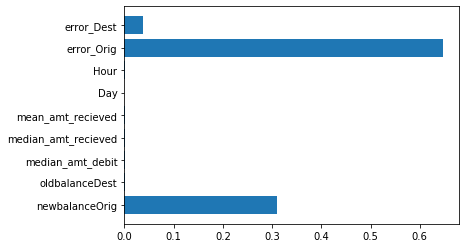

In [39]:
plt.barh(list(X),list(dtc.feature_importances_))

In [0]:
rfc=RandomForestClassifier(random_state=0,n_estimators=100)

In [41]:
rfc.fit(X_train_rus,y_train_rus)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rfc=rfc.predict(X_test)

In [43]:
recall_score(y_test,y_pred_rfc)

0.9957264957264957

In [44]:
f1_score(y_test,y_pred_rfc)

0.9711223578445967

<BarContainer object of 9 artists>

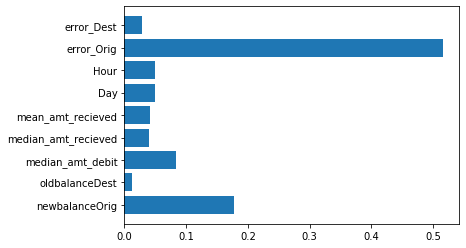

In [45]:
plt.barh(list(X),list(rfc.feature_importances_))

In [46]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270886
           1       0.95      1.00      0.97      1638

    accuracy                           1.00   1272524
   macro avg       0.97      1.00      0.99   1272524
weighted avg       1.00      1.00      1.00   1272524



In [0]:
param_rfc={"criterion":['entropy','gini'],
           "max_depth":np.arange(2,11),
           "min_samples_split":np.arange(2,5),
           'max_features':['auto','sqrt','log2']}

In [0]:
rfc_cv=GridSearchCV(estimator=rfc,param_grid=param_rfc,cv=5)

In [49]:
rfc_cv.fit(X_train_rus,y_train_rus)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [50]:
rfc_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rfcv=rfc_cv.best_estimator_.predict(X_test)

In [52]:
recall_score(y_test,y_pred_rfcv)

0.9957264957264957

In [53]:
f1_score(y_test,y_pred_rfcv)

0.9740220961481039

<BarContainer object of 9 artists>

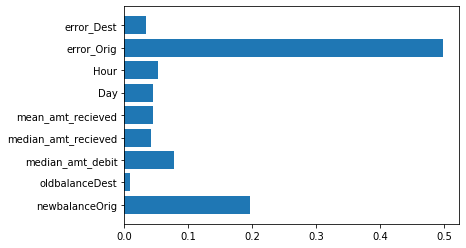

In [54]:
plt.barh(list(X),list(rfc_cv.best_estimator_.feature_importances_))

In [55]:
print(classification_report(y_test,y_pred_rfcv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270886
           1       0.95      1.00      0.97      1638

    accuracy                           1.00   1272524
   macro avg       0.98      1.00      0.99   1272524
weighted avg       1.00      1.00      1.00   1272524



In [56]:
confusion_matrix(y_test,y_pred_rfcv)

array([[1270806,      80],
       [      7,    1631]])